In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as func
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [3]:
spk = SparkSession.builder.appName('Playground').
 .config("spark.sql.repl.eagerEval.enabled", True) getOrCreate()

In [4]:
spk

In [5]:
# Read the parquet dataset
df = spk.read.parquet('/Users/oliver/Downloads/MAST30034_Python-main/data/tlc_data')

In [6]:
df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [7]:
df.count()

22821986

In [8]:
df.orderBy('tpep_pickup_datetime').select(['tpep_pickup_datetime','tpep_dropoff_datetime']).show()

+--------------------+---------------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|
+--------------------+---------------------+
| 2003-01-01 11:10:06|  2003-01-01 23:38:59|
| 2003-01-01 11:26:16|  2003-01-01 11:38:46|
| 2003-01-01 11:43:37|  2003-01-01 12:04:09|
| 2003-01-01 12:21:25|  2003-01-01 12:29:34|
| 2003-01-01 12:32:47|  2003-01-02 08:36:08|
| 2003-01-05 15:05:18|  2003-01-06 05:41:11|
| 2003-01-06 10:37:05|  2003-01-07 08:02:39|
| 2003-01-09 18:54:48|  2003-01-10 03:34:52|
| 2003-01-29 19:34:30|  2003-01-29 22:30:23|
| 2009-01-01 03:15:09|  2009-01-01 03:23:09|
| 2009-01-01 09:05:53|  2009-01-01 22:16:52|
| 2009-01-01 09:23:09|  2009-01-02 07:34:42|
| 2009-01-01 09:57:07|  2009-01-01 10:02:07|
| 2009-01-01 09:57:07|  2009-01-01 10:02:07|
| 2009-01-01 10:01:52|  2009-01-01 10:02:05|
| 2009-01-01 10:02:01|  2009-01-01 11:13:52|
| 2009-01-01 10:02:01|  2009-01-02 04:24:13|
| 2009-01-01 10:02:04|  2009-01-02 04:04:21|
| 2009-01-01 10:02:04|  2009-01-02 04:04:49|
| 2009-01-

In [9]:
df = df.withColumn("date_only", func.to_date(func.col("tpep_pickup_datetime")))

In [10]:
df.select(['tpep_pickup_datetime', 'date_only']).show()

+--------------------+----------+
|tpep_pickup_datetime| date_only|
+--------------------+----------+
| 2022-03-01 11:13:08|2022-03-01|
| 2022-03-01 11:47:52|2022-03-01|
| 2022-03-01 11:02:46|2022-03-01|
| 2022-03-01 11:52:43|2022-03-01|
| 2022-03-01 11:15:35|2022-03-01|
| 2022-03-01 11:11:57|2022-03-01|
| 2022-03-01 11:05:11|2022-03-01|
| 2022-03-01 11:30:56|2022-03-01|
| 2022-03-01 11:30:28|2022-03-01|
| 2022-03-01 11:30:28|2022-03-01|
| 2022-03-01 11:34:25|2022-03-01|
| 2022-03-01 11:35:11|2022-03-01|
| 2022-03-01 11:59:02|2022-03-01|
| 2022-03-01 11:16:00|2022-03-01|
| 2022-03-01 11:57:18|2022-03-01|
| 2022-03-01 11:01:50|2022-03-01|
| 2022-03-01 12:03:05|2022-03-01|
| 2022-03-01 11:28:14|2022-03-01|
| 2022-03-01 11:35:49|2022-03-01|
| 2022-03-01 11:22:31|2022-03-01|
+--------------------+----------+
only showing top 20 rows



In [11]:
df.select('date_only').distinct().count()

230

In [134]:
# Filter date
df2 = df.where((func.col("date_only") >= '2021-10-01') & (func.col("date_only") <= '2022-04-30'))

In [136]:
df2.select('date_only').count()

22746209

In [12]:
df3 = df2.sample(0.01).toPandas()

NameError: name 'df2' is not defined

In [141]:
df3.toPandas()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date_only
0,1,2022-03-01 11:37:51,2022-03-01 12:11:38,1.0,18.80,2.0,N,132,234,1,52.00,3.75,0.5,8.00,6.55,0.3,71.10,2.5,1.25,2022-03-01
1,2,2022-03-01 11:05:04,2022-03-01 11:08:27,3.0,0.59,1.0,N,170,164,2,4.50,0.50,0.5,0.00,0.00,0.3,8.30,2.5,0.00,2022-03-01
2,1,2022-03-01 11:15:16,2022-03-01 11:25:09,1.0,2.90,1.0,N,138,7,1,11.00,1.75,0.5,1.00,0.00,0.3,14.55,0.0,1.25,2022-03-01
3,2,2022-03-01 11:48:59,2022-03-01 11:50:28,1.0,0.00,5.0,N,68,68,2,14.90,0.00,0.5,0.00,0.00,0.3,18.20,2.5,0.00,2022-03-01
4,2,2022-03-01 11:09:12,2022-03-01 11:20:06,2.0,3.61,1.0,N,232,140,1,12.00,0.50,0.5,3.95,0.00,0.3,19.75,2.5,0.00,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227961,6,2022-02-01 06:01:28,2022-02-01 06:01:48,NaN,12.55,NaN,None,265,90,0,40.41,0.00,0.5,0.00,0.00,0.3,41.21,NaN,NaN,2022-02-01
227962,1,2022-02-01 07:08:55,2022-02-01 07:23:25,NaN,3.50,NaN,None,162,231,0,13.50,0.50,0.5,2.60,0.00,0.3,19.90,NaN,NaN,2022-02-01
227963,2,2022-02-01 07:54:52,2022-02-01 08:31:10,NaN,17.08,NaN,None,14,70,0,70.00,0.00,0.5,0.00,0.00,0.3,70.80,NaN,NaN,2022-02-01
227964,2,2022-02-01 09:37:00,2022-02-01 09:44:00,NaN,1.25,NaN,None,114,79,0,7.70,0.00,0.5,2.33,0.00,0.3,13.33,NaN,NaN,2022-02-01


In [142]:
import pandas as pd

In [143]:
location_data = pd.read_csv("/Users/oliver/Downloads/MAST30034_Python-main/data/taxi_zones/taxi+_zone_lookup.csv")

In [144]:
location_data

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [12]:
shp_path = '/Users/oliver/Downloads/taxi_zones/taxi_zones.shp'
sf = shp.Reader(shp_path)

In [31]:
sf.record()

0.116357453189

In [32]:
def read_shapefile(sf_shape):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """

    fields = [x[0] for x in sf_shape.fields][1:]
    records = [y[:] for y in sf_shape.records()]
    #records = sf_shape.records()
    shps = [s.points for s in sf_shape.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [33]:
map_df = read_shapefile(sf)

In [38]:
map_df.iloc[0]['coords']

[(933100.9183527103, 192536.08569720192),
 (933091.0114800561, 192572.17526147654),
 (933088.5848363293, 192604.9701013019),
 (933121.5604029286, 192857.3815947791),
 (933149.268070866, 192978.64529974),
 (933222.303599316, 193293.27321561542),
 (933252.5816221443, 193450.60036714407),
 (933297.7228000937, 193555.43279791903),
 (933330.5712151835, 193748.8233831425),
 (933350.6320882778, 193794.68697530977),
 (933355.7056937596, 193834.0240346551),
 (933365.7979032588, 193886.46647872418),
 (933431.7392324115, 194391.29051182547),
 (933465.0379729305, 194801.09275264665),
 (933463.4338186719, 195227.36293221635),
 (933471.1052103372, 195315.8792411817),
 (933483.7536692393, 195397.82719968376),
 (933511.4361339996, 195509.2545406304),
 (933554.0907006934, 195620.65066105462),
 (933609.1944352826, 195718.9049942211),
 (933669.2474974946, 195797.47528837126),
 (933731.7750771455, 195866.2036557206),
 (933779.2756322531, 195908.73159505273),
 (933841.7617821106, 195957.78647365439),
 (933

In [39]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

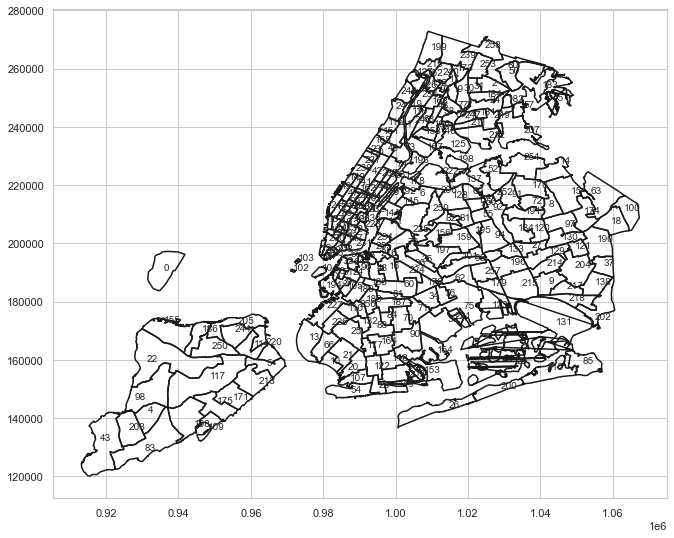

In [40]:
plot_map(sf)